In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('cdata.csv')
#讀檔案

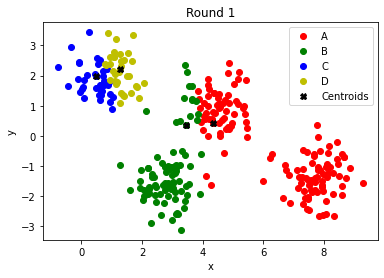

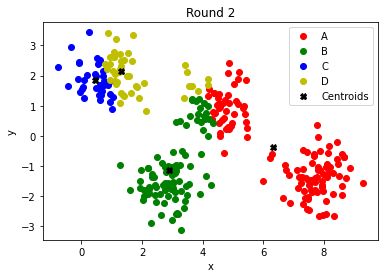

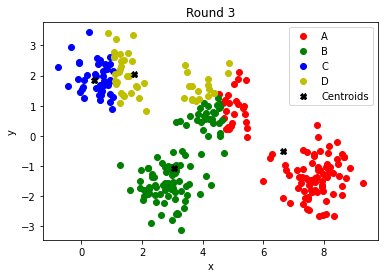

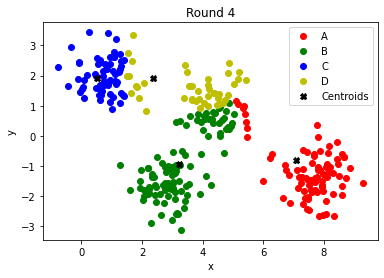

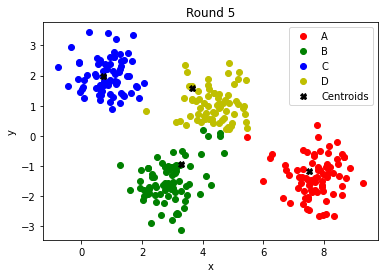

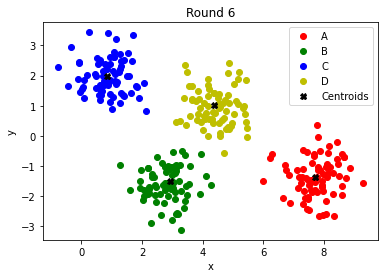

In [2]:
center = (df.sample(4, replace=False))
old_center = pd.DataFrame()
rou = 1
#先隨機取4個當中centroid
#要有一個變數存取舊的中心點 讓之後可以檢查中心點是否有移動
#rou為第幾個round
while not old_center.equals(center):#條件為中心點還有移動時進入迴圈
    dis = []
    for i in range(len(df)):
        empty = {}
        for j in range(len(center)):
            empty[j] = ((df.iloc[i]['x']-center.iloc[j]['x'])**2+(df.iloc[i]['y']-center.iloc[j]['y'])**2)**0.5
        dis.append(empty)
    distance = pd.DataFrame(dis)
    #計算距離
    df['cluster'] = distance.idxmin(axis=1)
    #更新cluster
    old_center = center
    #old_center為之前的中心點
    center = pd.DataFrame()
    k_means_frame = df.groupby('cluster').agg(np.mean)
    #透過該群的平均當作新的中心點
    center[k_means_frame.columns] = k_means_frame[k_means_frame.columns]
    data = (df[df.cluster == 0],df[df.cluster == 1] ,df[df.cluster == 2] ,df[df.cluster == 3])
    colors = ("ro", "go", "bo", "yo")
    groups = ("A", "B", "C","D")
    #把圖的顏色 資料 群都先設定好
    if old_center.equals(center):
        break
    #這邊是避免print出中心點一樣的兩張圖
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    for data, color, group in zip(data, colors, groups):
        x = data['x']
        y = data['y']
        plt.plot(x, y, color, label=group)
    plt.plot(old_center['x'], old_center['y'], "kX", label="Centroids")
    plt.xlabel('x')#x軸說明
    plt.ylabel('y')#y軸
    plt.title("Round "+str(rou))#第幾round
    plt.legend(loc=1)
    plt.show()
    rou+=1
#reference: https://towardsdatascience.com/k-means-clustering-algorithm-implementation-da0f735ab0f9

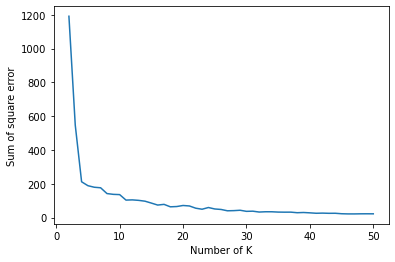

In [3]:
SSE = []
for index in range(2,51):    
    center = (df.sample(index, replace=False))
    new_center = pd.DataFrame()
    distance = pd.DataFrame()
    while not new_center.equals(center):
        count = 0
        for i, k_mean in center.iterrows():
            distance[count] = (df[center.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5)
            count += 1
        df['cluster'] = distance.idxmin(axis=1)
        new_center = center
        center = pd.DataFrame()
        k_means_frame = df.groupby('cluster').agg(np.mean)
        center[k_means_frame.columns] = k_means_frame[k_means_frame.columns]
    error = 0
    for i in range(len(distance)):
        error += (distance.iloc[i].min())**2
    SSE.append(error)
k = list(range(2,51))
#這邊有上面一樣差別在於 計算SSE 就要把distance的每一筆資料的最小值去平方並加總
plt.plot(k, SSE)
plt.xlabel("Number of K")
plt.ylabel("Sum of square error")
plt.show()

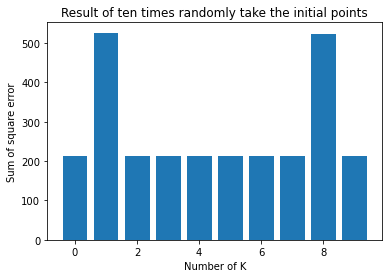

In [4]:
SSE = []
for index in range(10):    #跑十次
    center = (df.sample(4, replace=False))#k值固定
    new_center = pd.DataFrame()
    #distance = pd.DataFrame()
    while not new_center.equals(center):
        dis = []
        for i in range(len(df)):
            empty = {}
            for j in range(len(center)):
                empty[j] = ((df.iloc[i]['x']-center.iloc[j]['x'])**2+(df.iloc[i]['y']-center.iloc[j]['y'])**2)**0.5
            dis.append(empty)
        distance = pd.DataFrame(dis)
        df['cluster'] = distance.idxmin(axis=1)
        new_center = center
        center = pd.DataFrame()
        k_means_frame = df.groupby('cluster').agg(np.mean)
        center[k_means_frame.columns] = k_means_frame[k_means_frame.columns]
    error = 0
    for i in range(len(distance)):
        error += (distance.iloc[i].min())**2
    SSE.append(error)
k = list(range(10))

plt.bar(k, SSE)
plt.title("Result of ten times randomly take the initial points")
plt.xlabel("Number of K")
plt.ylabel("Sum of square error")
plt.show()